<a href="https://colab.research.google.com/github/HiteshAI/Plant_Classification/blob/master/plant_seedlings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
import pandas as pd
from fastai.metrics import error_rate
from fastai.callbacks import *
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")




from google.colab import drive
from pathlib import Path
drive.mount('/content/drive')
path= '/content/drive/My Drive/plant_seedlings'
path = Path(path)
data_path = path/'plant_seedling_extract'
model_path= path/'models'
data_path


Mounted at /content/drive


PosixPath('/content/drive/My Drive/plant_seedlings/plant_seedling_extract')

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
12


LabelLists;

Train: LabelList (3563 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Fat Hen,Fat Hen,Fat Hen,Fat Hen,Fat Hen
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Shepherds Purse,Charlock,Small-flowered Cranesbill,Loose Silky-bent,Charlock
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract;

Test: LabelList (794 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract

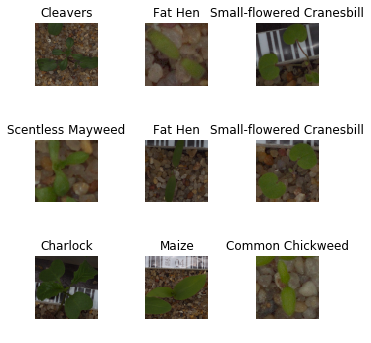

In [0]:
# **Load Dataset**
bs = 32
tfms = get_transforms(do_flip=True, flip_vert=True, max_warp=0., max_zoom=1.1, max_lighting=0.2)
data = ImageDataBunch.from_folder(data_path, test='test',  ds_tfms=tfms, valid_pct=0.25, size=64, bs=bs)
data.show_batch(rows=3, figsize=(5,5))
print(data.classes)
print(len(data.classes)),data.c
data.label_list

In [0]:
arch = models.densenet201
densenet_pretrained = cnn_learner(data, arch , pretrained=True, model_dir= model_path , metrics=[error_rate, accuracy], callback_fns=[partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=5)])

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:01<00:00, 52.9MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


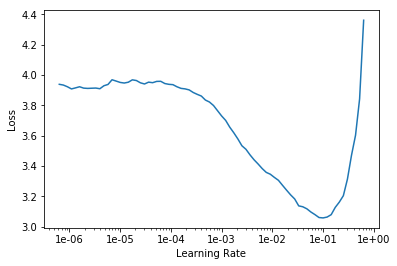

In [0]:
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()


In [0]:
lr = 1e-02
densenet_pretrained.fit_one_cycle(5, slice(lr))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.993710,1.372204,0.390901,0.609099,01:41
1,1.305638,1.038909,0.292334,0.707666,01:29
2,0.944860,0.646254,0.200505,0.799495,01:29
3,0.626997,0.443130,0.158382,0.841618,01:29
4,0.490688,0.406930,0.143218,0.856782,01:29


In [0]:
densenet_pretrained.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


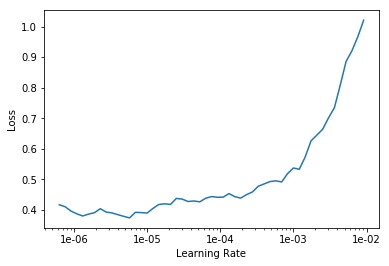

In [0]:
densenet_pretrained.unfreeze()
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()

In [0]:
densenet_pretrained.load('stage-1')
densenet_pretrained.fit_one_cycle(5, slice(1e-6,lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.469886,0.417585,0.144061,0.855939,01:35
1,0.445404,0.494127,0.184499,0.815501,01:33
2,0.400782,0.365074,0.129739,0.870261,01:33
3,0.322146,0.324028,0.112890,0.887110,01:34
4,0.310886,0.327610,0.117944,0.882056,01:34


In [0]:
densenet_pretrained.save('stage-2')

In [0]:
new_data = ImageDataBunch.from_folder(data_path, test='test',  ds_tfms=tfms, valid_pct=0.25, size=128, bs=bs)
densenet_pretrained.data = new_data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


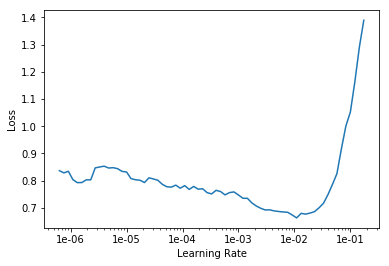

In [0]:
densenet_pretrained.freeze()
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()

In [0]:
lr=1e-3/2 
densenet_pretrained.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.656317,0.320693,0.119629,0.880371,01:45
1,0.463265,0.231736,0.083404,0.916596,01:40
2,0.395782,0.202398,0.069082,0.930918,01:40
3,0.337940,0.187699,0.064027,0.935973,01:40
4,0.300077,0.187818,0.067397,0.932603,01:40


In [0]:
densenet_pretrained.save('stage-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


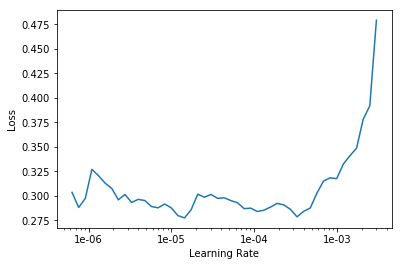

In [0]:
densenet_pretrained.unfreeze()
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()

In [0]:
densenet_pretrained.fit_one_cycle(5, slice(1e-4,lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.279452,0.183472,0.067397,0.932603,01:48
1,0.261916,0.164499,0.064027,0.935973,01:47
2,0.180299,0.135710,0.048863,0.951137,01:46
3,0.163905,0.124034,0.043808,0.956192,01:46
4,0.130067,0.118465,0.044650,0.955350,01:44


In [0]:
densenet_pretrained.save('stage-4')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


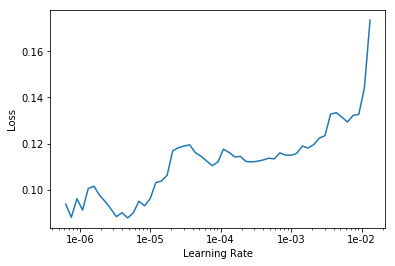

In [0]:
densenet_pretrained.freeze()
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()


In [0]:
densenet_pretrained.load('stage-4')


Learner(data=ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Fat Hen,Fat Hen,Fat Hen,Fat Hen,Fat Hen
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Shepherds Purse,Charlock,Small-flowered Cranesbill,Loose Silky-bent,Charlock
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract;

Test: LabelList (794 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-0

In [0]:
new_data = ImageDataBunch.from_folder(data_path, test='test',  ds_tfms=tfms, valid_pct=0.25, size=256, bs=bs)
densenet_pretrained.data = new_data

In [0]:
densenet_pretrained.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


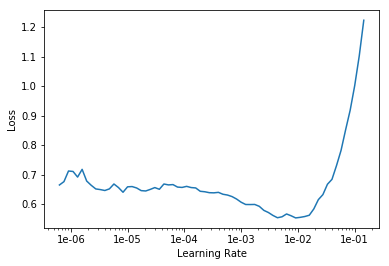

In [0]:

densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()

In [0]:
densenet_pretrained.fit_one_cycle(5,slice(1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.284806,0.129757,0.043808,0.956192,02:52
1,0.200774,0.117805,0.044650,0.955350,02:34
2,0.158819,0.129222,0.049705,0.950295,02:34
3,0.135123,0.104143,0.041281,0.958719,02:34
4,0.123008,0.099518,0.036226,0.963774,02:35


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


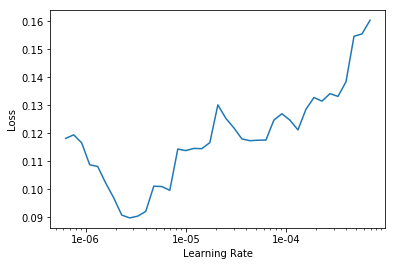

In [0]:
densenet_pretrained.unfreeze()
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()

In [15]:
densenet_pretrained.fit_one_cycle(6, slice(1e-06, 1e-3/2 ))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.127985,0.093989,0.034541,0.965459,03:11
1,0.124083,0.104676,0.039596,0.960404,03:11
2,0.106120,0.098296,0.031171,0.968829,03:10
3,0.083217,0.099785,0.032856,0.967144,03:10
4,0.068403,0.090831,0.032013,0.967987,03:09
5,0.065632,0.091315,0.029486,0.970514,03:10


In [0]:
densenet_pretrained.save('stage-5')


In [26]:
densenet_pretrained.load('stage-5')

Learner(data=ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272)
y: CategoryList
Fat Hen,Fat Hen,Fat Hen,Fat Hen,Fat Hen
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272)
y: CategoryList
Scentless Mayweed,Scentless Mayweed,Black-grass,Small-flowered Cranesbill,Loose Silky-bent
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract;

Test: LabelList (794 items)
x: ImageList
Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272),Image (3, 272, 272)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/plant_seedlings/plant_seedling_extract, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=Fa

In [0]:
new_data = ImageDataBunch.from_folder(data_path, test='test',  ds_tfms=tfms, valid_pct=0.25, size=282, bs=bs)
densenet_pretrained.data = new_data

In [0]:
densenet_pretrained.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


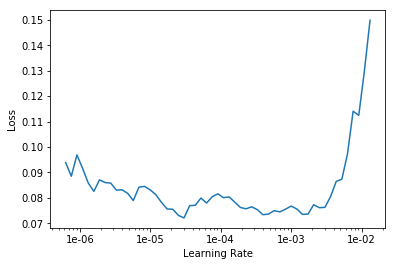

In [29]:
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()

In [30]:
lr= (1e-5)
densenet_pretrained.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.090223,0.056917,0.024431,0.975569,03:19
1,0.093893,0.052969,0.021061,0.978939,03:10
2,0.103159,0.055767,0.021061,0.978939,03:09
3,0.100742,0.052977,0.021061,0.978939,03:09
4,0.087544,0.055075,0.021904,0.978096,03:08


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


In [0]:
densenet_pretrained.save('stage-6')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


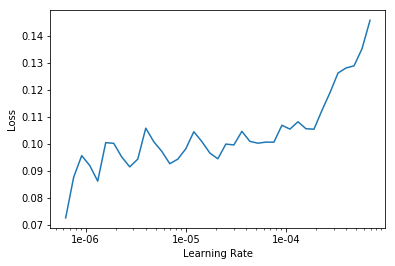

In [32]:
densenet_pretrained.unfreeze()
densenet_pretrained.lr_find()
densenet_pretrained.recorder.plot()

In [33]:
densenet_pretrained.fit_one_cycle(6, slice(1e-05, lr/5 ))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.086893,0.053117,0.019377,0.980623,03:52
1,0.094726,0.052244,0.019377,0.980623,03:52
2,0.077843,0.053345,0.018534,0.981466,03:52
3,0.071947,0.055323,0.020219,0.979781,03:51
4,0.073189,0.050591,0.018534,0.981466,03:51
5,0.068428,0.052339,0.018534,0.981466,03:50


In [0]:
densenet_pretrained.save('final')

In [35]:
interp = ClassificationInterpretation.from_learner(densenet_pretrained)
from sklearn import metrics
print(metrics.classification_report(interp.y_true.numpy(), interp.pred_class.numpy(),target_names =data.classes))

                           precision    recall  f1-score   support

              Black-grass       0.93      0.81      0.87        70
                 Charlock       1.00      1.00      1.00       115
                 Cleavers       0.99      0.99      0.99        70
         Common Chickweed       0.99      0.99      0.99       157
             Common wheat       1.00      0.98      0.99        45
                  Fat Hen       1.00      1.00      1.00       110
         Loose Silky-bent       0.92      0.98      0.95       163
                    Maize       1.00      0.98      0.99        45
        Scentless Mayweed       0.99      0.99      0.99       140
          Shepherds Purse       0.98      0.98      0.98        52
Small-flowered Cranesbill       1.00      1.00      1.00       120
               Sugar beet       1.00      1.00      1.00       100

                 accuracy                           0.98      1187
                macro avg       0.98      0.98      0.98    

In [0]:
preds,y=densenet_pretrained.get_preds(ds_type=DatasetType.Test)
preds = np.argmax(preds, axis = 1)
preds_classes = [data.classes[i] for i in preds]


In [37]:
submission = pd.DataFrame({ 'file': os.listdir('/content/drive/My Drive/plant_seedlings/plant_seedling_extract/test'), 'species': preds_classes })
submission.to_csv('test_classification_results.csv', index=False)


,file,species
0,abc331628.png,Common wheat
1,4c5ab9b68.png,Cleavers
2,9aa5587fe.png,Loose Silky-bent
3,eec1079a1.png,Charlock
4,13b9fa92d.png,Sugar beet
5,1376f3b63.png,Loose Silky-bent
6,e3f50adfc.png,Cleavers
7,0ebf8f2f4.png,Maize
8,2dd5cfba9.png,Shepherds Purse
9,19618ad6a.png,Sugar beet
